# 正規化

過学習(overfitting)を防ぐためのテクニック。
背景にある考え方は、極端なパラメータの重みにより過学習が起こってしまうので、それらにペナルティを科すための追加情報（バイアス）を導入する。

$$
\frac{λ}{2} ||W||^2 = \frac{λ}{2} \sum_{j=1}^m w_j^2
$$

$$
\text{(λは正規化パラメータ)}
$$


### 留意事項

正規化を正常に機能させるためには、すべての特徴量が比較可能な尺度である必要があり、そのために、特徴量のスケジューリングをしておく必要があります。


## ロジスティック回帰に正規化を適用してみる

ロジスティック回帰のコスト関数

$$
J(W) = \sum_{i=1}^n [-y ^{(i)} \log( \phi( z^{(i)} ) ) - ( 1 - y^{(i)}) \log ( 1 - \phi ( z^{(i)})) ]
$$

正規化されたロジスティック回帰のコスト関数

$$
J(W) = \sum_{i=1}^n [-y ^{(i)} \log( \phi( z^{(i)} ) ) - ( 1 - y^{(i)}) \log ( 1 - \phi ( z^{(i)})) ] + \frac{λ}{2} \sum_{j=1}^m w_j^2
$$

正規化されたロジスティック回帰のコスト関数

$$
J(W) = C\sum_{i=1}^n [-y ^{(i)} \log( \phi( z^{(i)} ) ) - ( 1 - y^{(i)}) \log ( 1 - \phi ( z^{(i)})) ] + \frac{1}{2} \sum_{j=1}^m w_j^2
$$

C は SVMの慣例により、 $ C = \frac{1}{λ} $ と定義されている


## 重み係数と逆正規化パラメータCの関係をプロット

In [1]:
# データの用意
import lib
X_train_std, X_test_std, y_train, y_test = lib.load_iris_data()

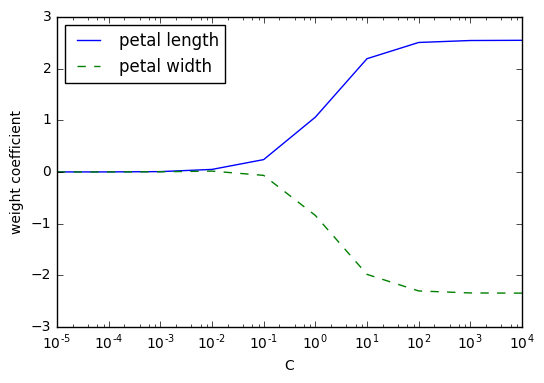

In [2]:
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline

# 重み係数と逆正規化パラメータのリストを生成
weights, params = [], []

# 10個の逆正規化パラメータに対応するロジスティック回帰モデルをそれぞれ処理
for c in np.arange(-5, 5):
    lr = LogisticRegression(C=10**c, random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1]) # 重み係数を格納
    params.append(10**c) # 逆正規化パラメータを格納
    
weights = np.array(weights)

# 重み係数と逆正規化パラメータの関係をプロット
plt.plot(params, weights[:, 0], label='petal length')
plt.plot(params, weights[:, 1], linestyle='--', label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log') # 横軸を対数スケールに設定
plt.show()

# パラメータCが減少し、正規化の強さが増すと、重み係数が0に近づいていく。